In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

### Load and Visualize the Dataset

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

# Reshape: add channel dimension (grayscale = 1)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print(f"Training set  : {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_test.shape}, {y_test.shape}")

Training set  : (60000, 28, 28, 1), (60000,)
Validation set: (10000, 28, 28, 1), (10000,)


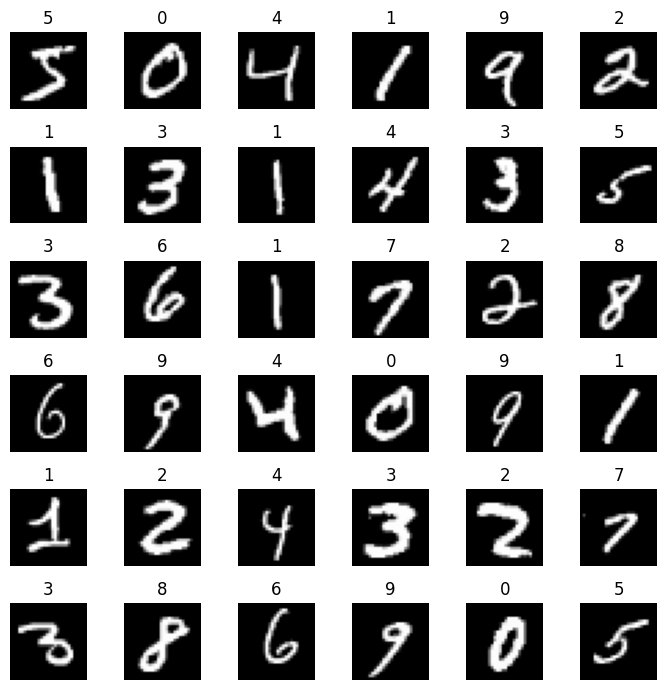

In [12]:
# Visualize a few images
plt.figure(figsize=(7, 7))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"{y_train[i]}")
plt.tight_layout()
plt.show()

### Design the Model

In [4]:
model = tf.keras.models.Sequential([
    # Input 28x28 grayscale image
    tf.keras.layers.Input(shape=(28, 28, 1)), 
    
    # Convolutional layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [5]:
training = model.fit(x_train,
                     y_train,
                     epochs=5,
                     validation_data=(x_test, y_test),
                     verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9550 - loss: 0.1457 - val_accuracy: 0.9821 - val_loss: 0.0573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9858 - loss: 0.0467 - val_accuracy: 0.9872 - val_loss: 0.0377
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9882 - val_loss: 0.0374
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9896 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9889 - val_loss: 0.0322


### Evaluate the Model

In [6]:
validation_scores = model.evaluate(x_test, y_test)

scoring_metric_names = ['Loss', 'Accuracy']
for i, metric_name in enumerate(scoring_metric_names):
    last_training_score = training.history[metric_name.lower()][-1]
    print(f"Training {metric_name}  : {last_training_score:.2f}")
    print(f"Validation {metric_name}: {validation_scores[i]:.2f}")
    print()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0322
Training Loss  : 0.02
Validation Loss: 0.03

Training Accuracy  : 0.99
Validation Accuracy: 0.99



### Make Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


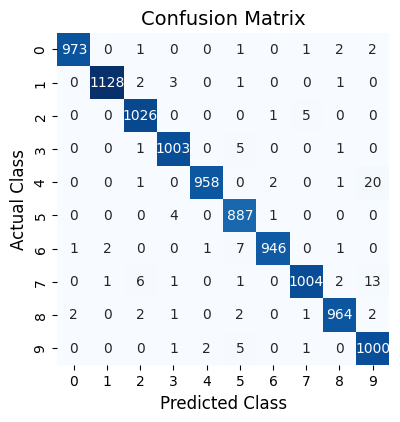

In [7]:
predictions = model.predict(x_test)

# Convert probablily distribution to classes
predicted_classes = np.argmax(predictions, axis=1)

correct_indices = []
incorrect_indices = []
for i in range(len(predicted_classes)):
    if predicted_classes[i] == y_test[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

# Plot confusion matrix
plt.figure(figsize=(25, 25))
cm = confusion_matrix(y_test, predicted_classes)
ax = plt.subplot(5, 2, 3 * 2 - 1, aspect='equal')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title(f'Confusion Matrix', fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
ax.tick_params(labelsize=10)
plt.show()

Correct Predictions: 9889


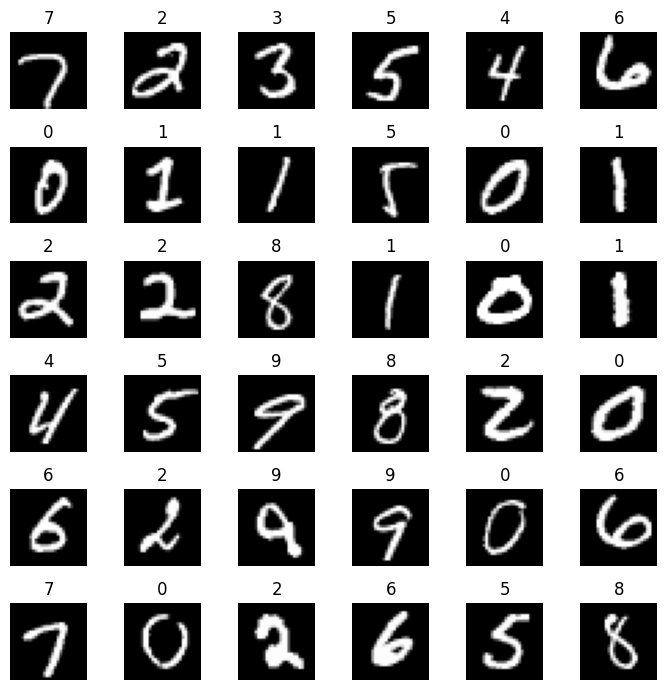

In [8]:
print("Correct Predictions:", len(correct_indices))

# Show some random predictions
plt.figure(figsize=(7,7))
for i in range(36):
    idx = random.choice(correct_indices)
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"{predicted_classes[idx]}")
plt.tight_layout()
plt.show()

Incorrect Predictions: 111


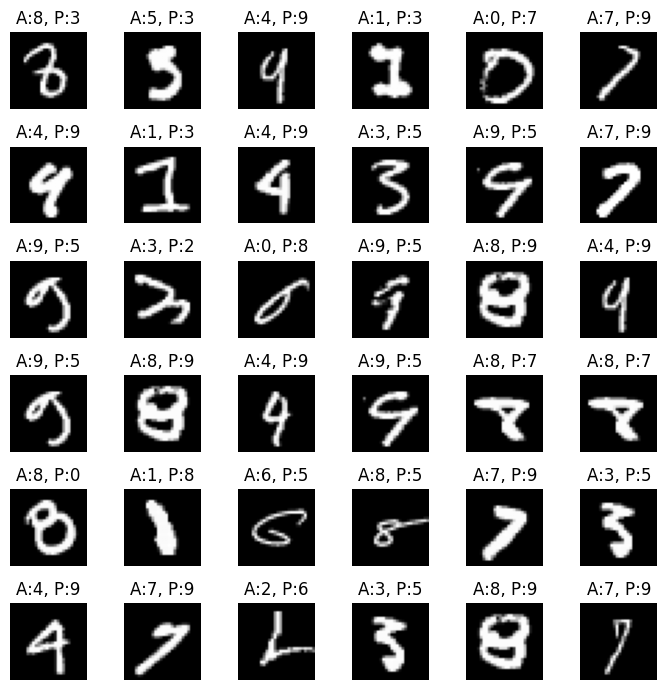

In [ ]:
print("Incorrect Predictions:", len(incorrect_indices))

# Show some incorrect predictions
plt.figure(figsize=(7,7))
for i in range(36):
    idx = random.choice(incorrect_indices)
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"P:{predicted_classes[idx]}, A:{y_test[idx]}")
plt.tight_layout()
plt.show()

### Visualize Training Epochs

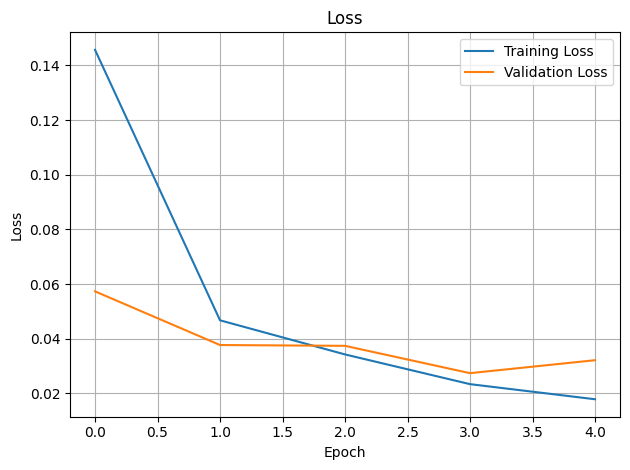

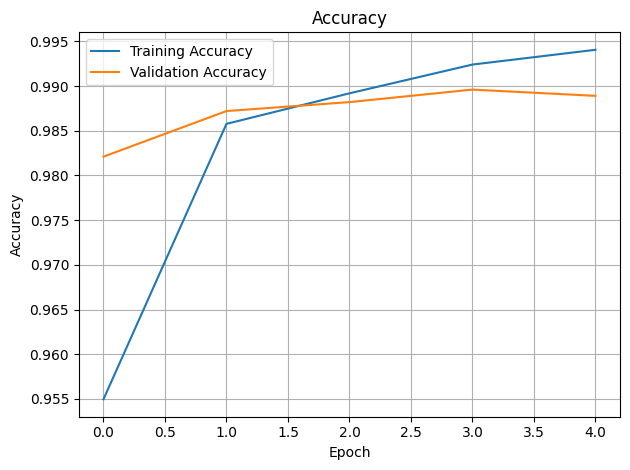

In [10]:
# Plot training scoring metrics
for metric_name in scoring_metric_names:
  metric = metric_name.lower()
  val_metric = f'val_{metric}'
  plt.plot(training.history[metric], label=f'Training {metric_name}')
  plt.plot(training.history[val_metric], label=f'Validation {metric_name}')
  plt.title(f'{metric_name}')
  plt.xlabel('Epoch')
  plt.ylabel(metric_name)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

### Visualize Convolution Layers

Weights shape: (3, 3, 1, 32)


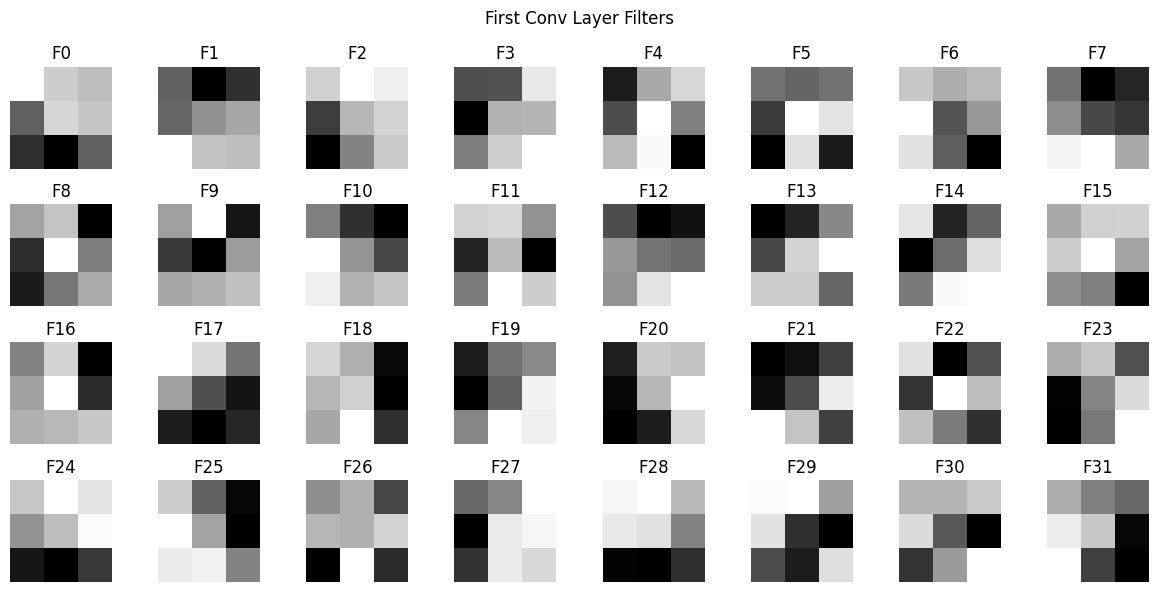

In [11]:
# Normalize for display
def normalize(img):
    img -= img.min()
    img /= img.max()
    return img

# Get weights of the first Conv2D layer
layer = model.layers[0]
weights, biases = layer.get_weights()
print("Weights shape:", weights.shape)

num_filters = weights.shape[3]
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(num_filters):
    fltr = weights[:, :, :, i]  # shape: (3, 3, 1)
    fltr = normalize(fltr)      # normalize to [0,1] for visualization

    # Create a single image by stacking RGB channels
    ax = axes[i // 8, i % 8]
    ax.imshow(fltr, cmap='gray')
    ax.axis('off')
    ax.set_title(f'F{i}')
    
plt.suptitle('First Conv Layer Filters')
plt.tight_layout()
plt.show()